### Parameterized Ciruits (NLocal Circuits)

In [34]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import NLocal
from qiskit.circuit import ParameterVector
from qiskit.providers.basicaer import QasmSimulatorPy

In [35]:
# Setup Simulator
sim = QasmSimulatorPy()

In [36]:
# Design Rotation Circuit & ParameterVector
rot_param = ParameterVector('r', 2)
rot_circ = QuantumCircuit(2)
rot_circ.rz(rot_param[0], 0)
rot_circ.ry(rot_param[1], 1)

In [37]:
# Design Entanglement Circuit & ParamaterVector
ent_param = ParameterVector('e', 3)
ent_circ = QuantumCircuit(4)
ent_circ.crx(ent_param[0], 0, 1)
ent_circ.crx(ent_param[1], 1, 2)
ent_circ.crx(ent_param[2], 2, 3)

In [38]:
# Setup NLocal Circuit
nlocal_circ = NLocal(
    num_qubits=6,
    rotation_blocks=rot_circ,
    entanglement_blocks=ent_circ,
    entanglement='linear',
    skip_final_rotation_layer=True,
    insert_barriers=True
)

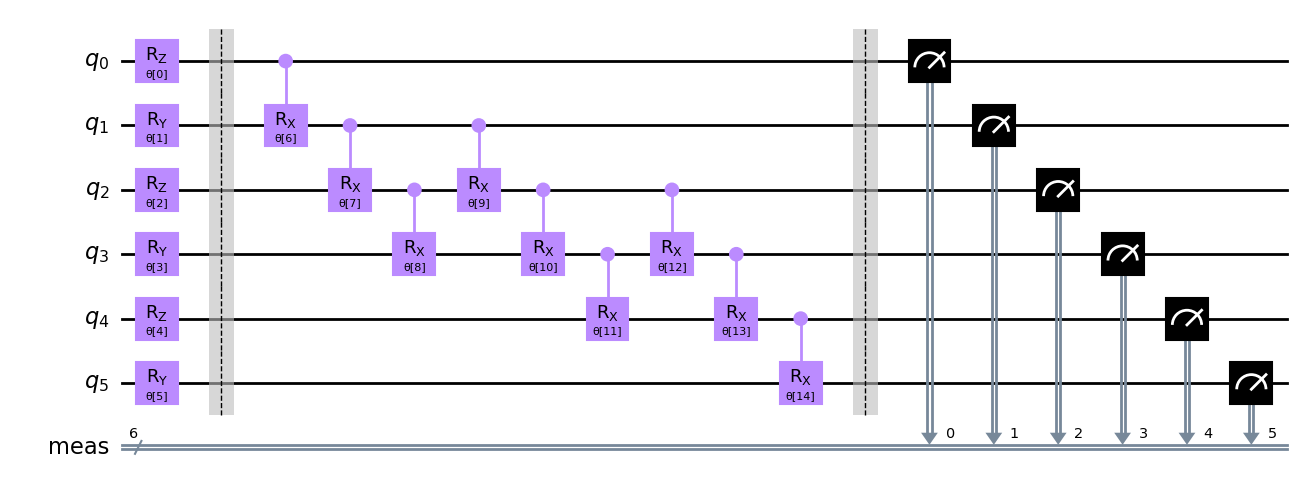

In [39]:
# Draw NLocal Circuit
nlocal_circ.measure_all()
nlocal_circ.decompose().draw('mpl')